# Standard imports

In [359]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Miami Dataset

## Exploratory Data Analysis

### Storing and reading the data

In [360]:
miami_data = pd.read_csv('miami-housing.csv')
miami_data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [361]:
miami_data.drop(['LATITUDE', 'LONGITUDE','PARCELNO'], axis = 1, inplace=True)
miami_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SALE_PRC           13932 non-null  float64
 1   LND_SQFOOT         13932 non-null  int64  
 2   TOT_LVG_AREA       13932 non-null  int64  
 3   SPEC_FEAT_VAL      13932 non-null  int64  
 4   RAIL_DIST          13932 non-null  float64
 5   OCEAN_DIST         13932 non-null  float64
 6   WATER_DIST         13932 non-null  float64
 7   CNTR_DIST          13932 non-null  float64
 8   SUBCNTR_DI         13932 non-null  float64
 9   HWY_DIST           13932 non-null  float64
 10  age                13932 non-null  int64  
 11  avno60plus         13932 non-null  int64  
 12  month_sold         13932 non-null  int64  
 13  structure_quality  13932 non-null  int64  
dtypes: float64(7), int64(7)
memory usage: 1.5 MB


In [362]:
miami_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SALE_PRC,13932.0,399941.931740,317214.683816,72000.0,235000.000,310000.00,428000.000,2650000.0
LND_SQFOOT,13932.0,8620.879917,6070.088742,1248.0,5400.000,7500.00,9126.250,57064.0
TOT_LVG_AREA,13932.0,2058.044574,813.538535,854.0,1470.000,1877.50,2471.000,6287.0
SPEC_FEAT_VAL,13932.0,9562.493468,13890.967782,0.0,810.000,2765.50,12352.250,175020.0
RAIL_DIST,13932.0,8348.548715,6178.027333,10.5,3299.450,7106.30,12102.600,29621.5
OCEAN_DIST,13932.0,31690.993798,17595.079468,236.1,18079.350,28541.75,44310.650,75744.9
WATER_DIST,13932.0,11960.285235,11932.992369,0.0,2675.850,6922.60,19200.000,50399.8
CNTR_DIST,13932.0,68490.327132,32008.474808,3825.6,42823.100,65852.40,89358.325,159976.5
SUBCNTR_DI,13932.0,41115.047265,22161.825935,1462.8,23996.250,41109.90,53949.375,110553.8
HWY_DIST,13932.0,7723.770693,6068.936108,90.2,2998.125,6159.75,10854.200,48167.3


In [363]:
miami_data.corr()

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
SALE_PRC,1.000000,0.363077,0.667301,0.497500,-0.077009,-0.274675,-0.127938,-0.271425,-0.370078,0.231877,-0.123408,-0.027026,0.000325,0.383995
LND_SQFOOT,0.363077,1.000000,0.437472,0.390707,-0.083901,-0.161579,-0.055093,-0.023181,-0.159094,0.130488,0.101244,-0.005899,0.005926,-0.006686
TOT_LVG_AREA,0.667301,0.437472,1.000000,0.506064,0.075486,-0.050141,0.148343,0.136526,-0.044882,0.229497,-0.340606,-0.056545,0.002517,0.173422
SPEC_FEAT_VAL,0.497500,0.390707,0.506064,1.000000,-0.021965,-0.055155,0.013923,-0.048817,-0.151916,0.153770,-0.098780,-0.008879,-0.014012,0.188030
RAIL_DIST,-0.077009,-0.083901,0.075486,-0.021965,1.000000,0.258966,0.162313,0.444494,0.485468,-0.092495,-0.234515,-0.116955,0.010560,-0.074075
OCEAN_DIST,-0.274675,-0.161579,-0.050141,-0.055155,0.258966,1.000000,0.490764,0.245396,0.425869,0.093500,-0.159409,0.035215,-0.012723,0.209497
WATER_DIST,-0.127938,-0.055093,0.148343,0.013923,0.162313,0.490764,1.000000,0.526952,0.195280,0.400233,-0.330578,-0.096339,0.010556,-0.034343
CNTR_DIST,-0.271425,-0.023181,0.136526,-0.048817,0.444494,0.245396,0.526952,1.000000,0.766387,0.076484,-0.548287,-0.130857,0.023096,-0.330588
SUBCNTR_DI,-0.370078,-0.159094,-0.044882,-0.151916,0.485468,0.425869,0.195280,0.766387,1.000000,-0.093982,-0.385278,-0.073202,0.016334,-0.248656
HWY_DIST,0.231877,0.130488,0.229497,0.153770,-0.092495,0.093500,0.400233,0.076484,-0.093982,1.000000,-0.120505,-0.019788,-0.004547,0.193529


### Representing initial data

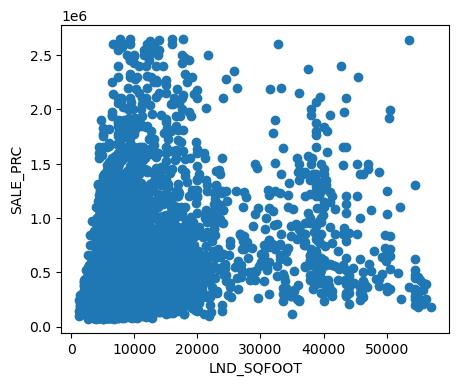

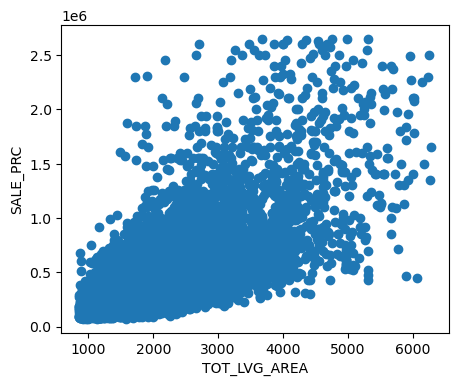

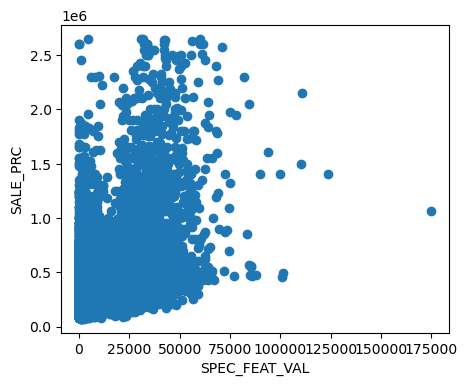

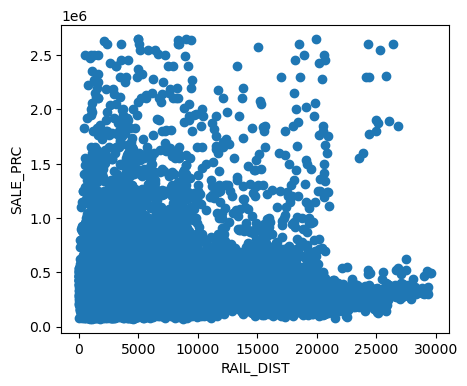

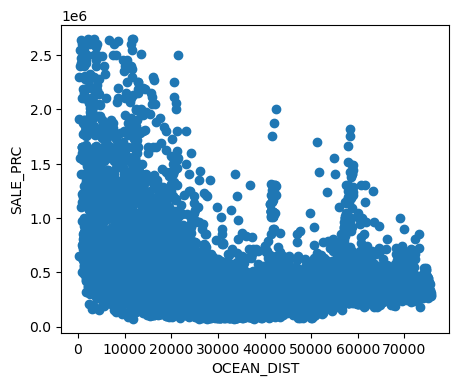

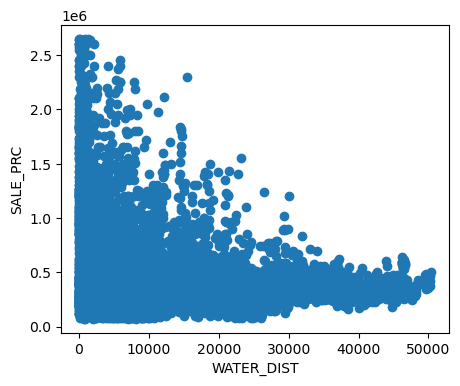

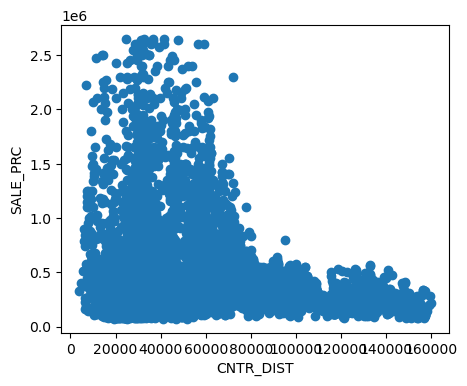

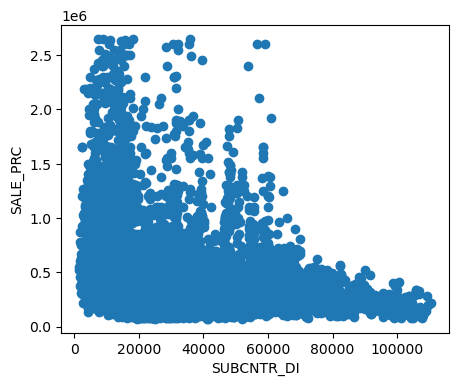

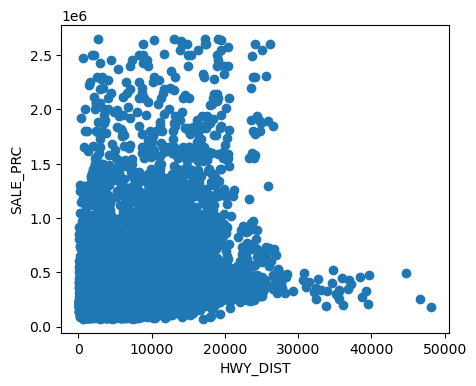

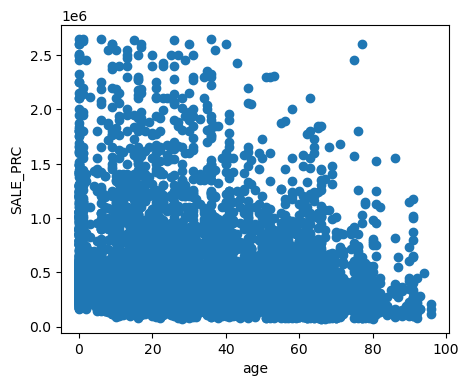

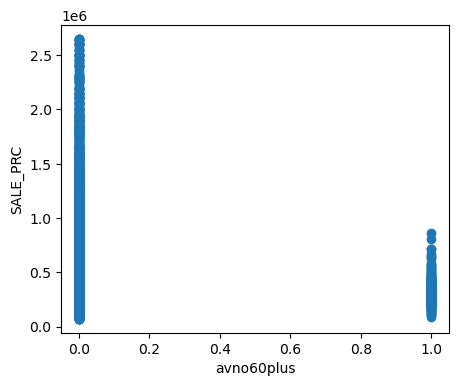

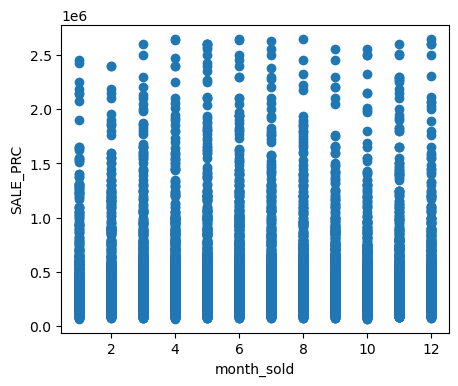

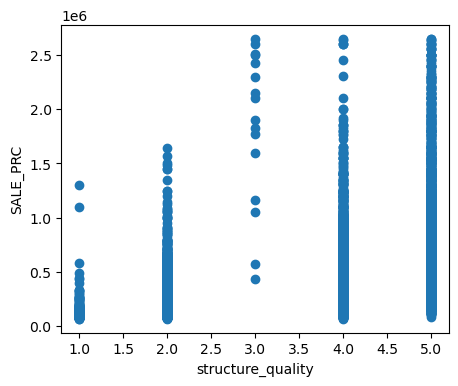

In [364]:
for feature in miami_data:
    if feature != 'SALE_PRC':
        plt.figure(figsize=(5, 4));
        plt.scatter(miami_data[feature], miami_data['SALE_PRC']);
        plt.ylabel('SALE_PRC');
        plt.xlabel(feature);
    plt.show();

### Separating the data into two separate tables to show the target column

In [365]:
X_miami = miami_data.drop('SALE_PRC', axis=1)
y_miami = miami_data['SALE_PRC']

## Feature Scaling and PCA

[0.23567885 0.16756435 0.11279881 0.08410814 0.07699717 0.07293779
 0.0649851  0.04833165 0.04193641 0.03823734 0.02685914 0.0243535
 0.00521176]
0.8150702088907673


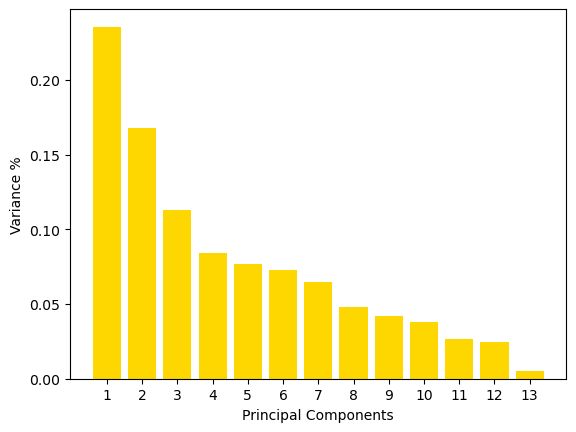

In [366]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

### Testing and Training the data

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (11145, 7)
Testing  Shape:  (2787, 7)


## Evaluation Score Function

In [368]:
def eval(y_test, predictions, results=[]):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    results = [mae, rmse, r2]
    print("Mean Absolute Error: ", round(mae, 5))
    print("Root Mean Squared Error: ", round(rmse, 5))
    print("R-squared (R2) Score:", round(r2, 5))
    return results

## Performing Linear Regression

### Model fitting and predictions

In [369]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.639150090626909
Testing R^2 Score: 0.6262890874817233


### Data representation

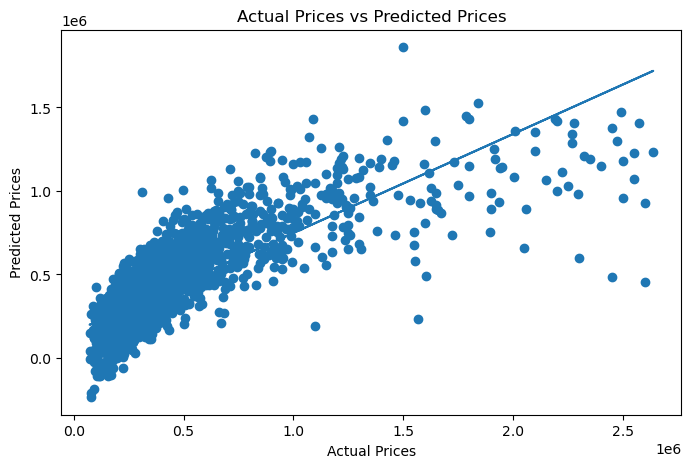

In [370]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'SALE_PRC')

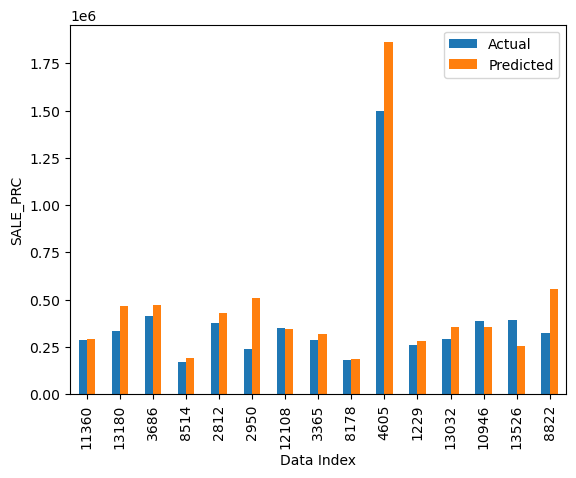

In [371]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("SALE_PRC")

### Model Evaluation

In [372]:
results = []
lm = eval(y_test, predictions, results)

Mean Absolute Error:  123236.95803
Root Mean Squared Error:  208714.90385
R-squared (R2) Score: 0.62629


## Performing Random Forest

### Model fitting and predictions

In [373]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.9752947546053992
Testing R^2 Score: 0.8121316641001801


### Data representation

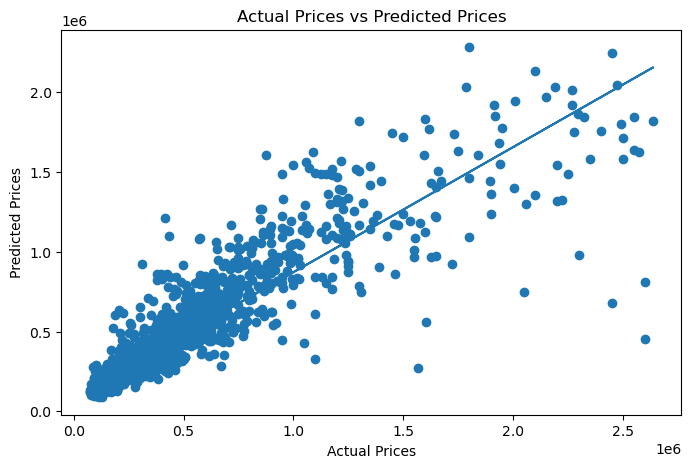

In [374]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'SALE_PRC')

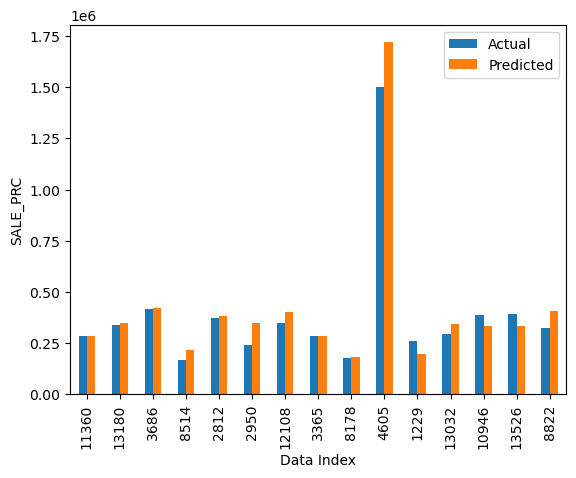

In [375]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("SALE_PRC")

### Model Evaluation

In [376]:
rfr = eval(y_test, predictions, results)

Mean Absolute Error:  68645.91115
Root Mean Squared Error:  147983.18374
R-squared (R2) Score: 0.81213


## Performing Gradient Boost

### Model fitting and predictions

In [377]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.8451856966801101
Testing R^2 Score: 0.789218234715808


### Data representation

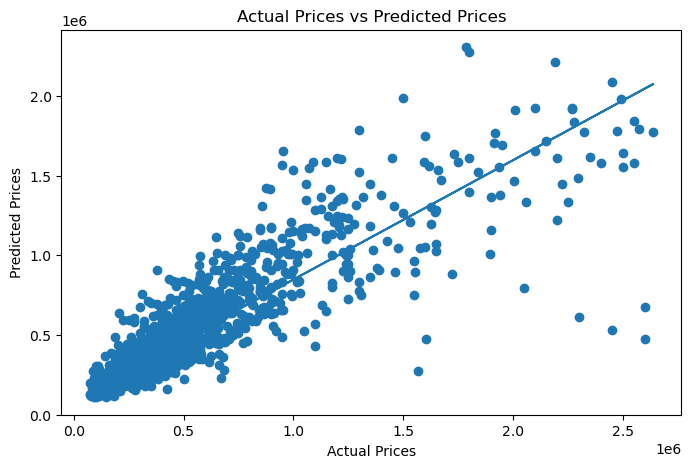

In [378]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'SALE_PRC')

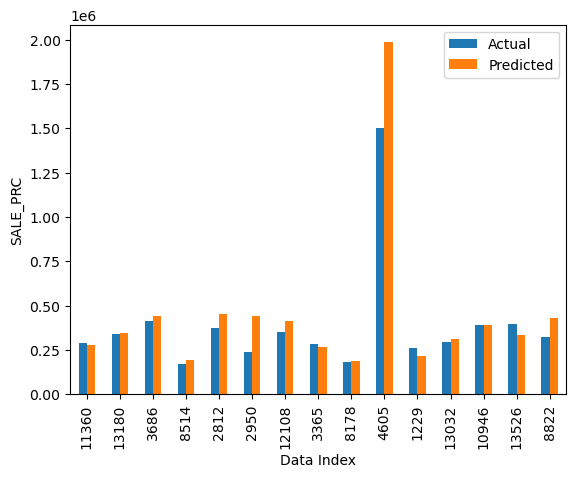

In [379]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("SALE_PRC")

### Model Evaluation

In [380]:
gbr = eval(y_test, predictions, results)

Mean Absolute Error:  79666.39704
Root Mean Squared Error:  156748.02988
R-squared (R2) Score: 0.78922


## Dealing with Outliers

### IQR Method

In [381]:
column_names = ["SALE_PRC", "LND_SQFOOT", "TOT_LVG_AREA", "SPEC_FEAT_VAL", 
                "RAIL_DIST", "OCEAN_DIST", "WATER_DIST", "CNTR_DIST", 
                "SUBCNTR_DI", "HWY_DIST", "age", "avno60plus", 
                "month_sold", "structure_quality"]

In [382]:
Q1 = miami_data[column_names].quantile(0.25)
Q3 = miami_data[column_names].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (miami_data[column_names] < lower_bound) | (miami_data[column_names] > upper_bound)
miami_data_no_outliers = miami_data[~outliers.any(axis=1)]
print(miami_data_no_outliers.shape)

(10137, 14)


In [383]:
X_miami = miami_data_no_outliers.drop('SALE_PRC', axis=1)
y_miami = miami_data_no_outliers['SALE_PRC']

In [384]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[2.72034143e-01 1.49369907e-01 1.12442458e-01 9.55761991e-02
 8.33131960e-02 6.92460606e-02 5.98654275e-02 4.61443760e-02
 4.31651406e-02 3.49935179e-02 2.77966465e-02 6.05292828e-03
 3.89277987e-36]
0.7127359027284955


In [385]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (8109, 5)
Testing  Shape:  (2028, 5)


In [386]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  69245.12706
Root Mean Squared Error:  93105.65101
R-squared (R2) Score: 0.33765


In [387]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  43397.94037
Root Mean Squared Error:  65385.43766
R-squared (R2) Score: 0.67334


In [388]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  53863.45529
Root Mean Squared Error:  76921.29336
R-squared (R2) Score: 0.5479


### Outlier Capping Method

In [389]:
miami_data_no_outliers = miami_data.copy()
for col in column_names:
    miami_data_no_outliers[col] = miami_data[col].clip(lower_bound[col], upper_bound[col])
print(miami_data_no_outliers.shape)

(13932, 14)


In [390]:
X_miami = miami_data_no_outliers.drop('SALE_PRC', axis=1)
y_miami = miami_data_no_outliers['SALE_PRC']

In [391]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[2.58676684e-01 1.78539054e-01 1.22260555e-01 8.82114117e-02
 8.32601211e-02 7.05013281e-02 5.28112381e-02 4.31968634e-02
 4.22334131e-02 2.96567659e-02 2.49917036e-02 5.66086199e-03
 1.83796556e-35]
0.7309478257944874


In [392]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

X_Cap_train = X_train
X_Cap_test = X_test
y_Cap_train = y_train
y_Cap_test = y_test

Training Shape:  (11145, 5)
Testing  Shape:  (2787, 5)


In [393]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_cap = eval(y_test, predictions, results)

Mean Absolute Error:  73914.36872
Root Mean Squared Error:  97820.78216
R-squared (R2) Score: 0.67721


In [394]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  46533.78528
Root Mean Squared Error:  71439.05587
R-squared (R2) Score: 0.82784


In [395]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  56528.89121
Root Mean Squared Error:  79517.38099
R-squared (R2) Score: 0.7867


### Z Score Method

In [396]:
miami_data_no_outliers = miami_data.copy()
z_scores = (miami_data[column_names] - miami_data[column_names].mean()) / miami_data[column_names].std()

threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

miami_data_no_outliers = miami_data[~outliers.any(axis=1)]
print(miami_data_no_outliers.shape)

(12840, 14)


In [397]:
X_miami = miami_data_no_outliers.drop('SALE_PRC', axis=1)
y_miami = miami_data_no_outliers['SALE_PRC']

In [398]:
X_miami = StandardScaler().fit_transform(X_miami)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_miami)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_miami)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[2.59545932e-01 1.67763860e-01 1.27120528e-01 8.85855299e-02
 8.32074186e-02 6.95815112e-02 5.18111631e-02 4.57661209e-02
 4.26470499e-02 3.19542307e-02 2.62605931e-02 5.75606295e-03
 3.31636913e-36]
0.7262232682454919


In [399]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_miami, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (10272, 5)
Testing  Shape:  (2568, 5)


In [400]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_z = eval(y_test, predictions, results)

Mean Absolute Error:  95423.81712
Root Mean Squared Error:  138430.43673
R-squared (R2) Score: 0.5128


In [401]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_z = eval(y_test, predictions, results)

Mean Absolute Error:  59612.57763
Root Mean Squared Error:  101829.15528
R-squared (R2) Score: 0.73637


In [402]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_z = eval(y_test, predictions, results)

Mean Absolute Error:  72262.86532
Root Mean Squared Error:  113658.76454
R-squared (R2) Score: 0.67156


## Hyperparameter Tuning

### Random Search CV

Since Capping performed the best for outliers, we chose it here

In [403]:
X_train = X_Cap_train
X_test = X_Cap_test
y_train = y_Cap_train
y_test = y_Cap_test
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (11145, 5)
Testing  Shape:  (2787, 5)


In [404]:
rf = RandomForestRegressor()

param_dist = {
    'n_estimators': randint(10, 100),  
    'max_depth': randint(1, 10),        
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)  
}

rscv = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

rscv.fit(X_train, y_train)

print("Best Parameters:", rscv.best_params_)

predictions = rscv.best_estimator_.predict(X_test)
rscv_rfr = eval(y_test, predictions, results)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 33}
Mean Absolute Error:  53083.2129
Root Mean Squared Error:  75892.75474
R-squared (R2) Score: 0.8057


## Summary

In [405]:
model_metrics_dict = {
    'Linear': lm,
    'Random Forest': rfr,
    'Gradient Boost': gbr,
    'Linear(IQR)': lm_iqr,
    'Random Forest(IQR)': rfr_iqr,
    'Gradient Boost(IQR)': gbr_iqr,
    'Linear(Cap)': lm_cap,
    'Random Forest(Cap)': rfr_cap,
    'Gradient Boost(Cap)': gbr_cap,
    'Linear(Z-Score)': lm_z,
    'Random Forest(Z-Score)': rfr_z,
    'Gradient Boost(Z-Score)': gbr_z,
    'Random Forest(RSCV)': rscv_rfr,
}

model_names = []
mae_values = []
rmse_values = []
r2_values = []

for model_name, metrics in model_metrics_dict.items():
    model_names.append(model_name)
    mae_values.append(metrics[0])
    rmse_values.append(metrics[1])
    r2_values.append(metrics[2])

model_metrics = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R2': r2_values
})

print(model_metrics)

                      Model            MAE           RMSE        R2
0                    Linear  123236.958025  208714.903850  0.626289
1             Random Forest   68645.911148  147983.183737  0.812132
2            Gradient Boost   79666.397035  156748.029881  0.789218
3               Linear(IQR)   69245.127064   93105.651014  0.337645
4        Random Forest(IQR)   43397.940370   65385.437656  0.673336
5       Gradient Boost(IQR)   53863.455290   76921.293355  0.547903
6               Linear(Cap)   73914.368723   97820.782155  0.677207
7        Random Forest(Cap)   46533.785280   71439.055868  0.827840
8       Gradient Boost(Cap)   56528.891208   79517.380990  0.786703
9           Linear(Z-Score)   95423.817125  138430.436729  0.512795
10   Random Forest(Z-Score)   59612.577631  101829.155277  0.736371
11  Gradient Boost(Z-Score)   72262.865324  113658.764538  0.671561
12      Random Forest(RSCV)   53083.212898   75892.754740  0.805705


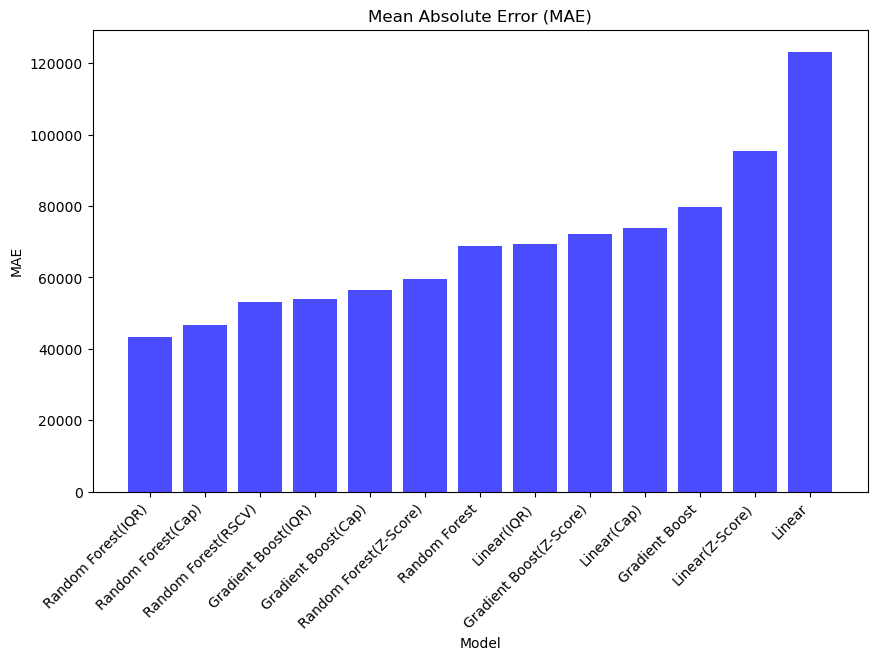

In [421]:
model_metrics_sorted = model_metrics.sort_values(by='MAE', ascending=True)
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_sorted['Model'], model_metrics_sorted['MAE'], color='blue', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.show()

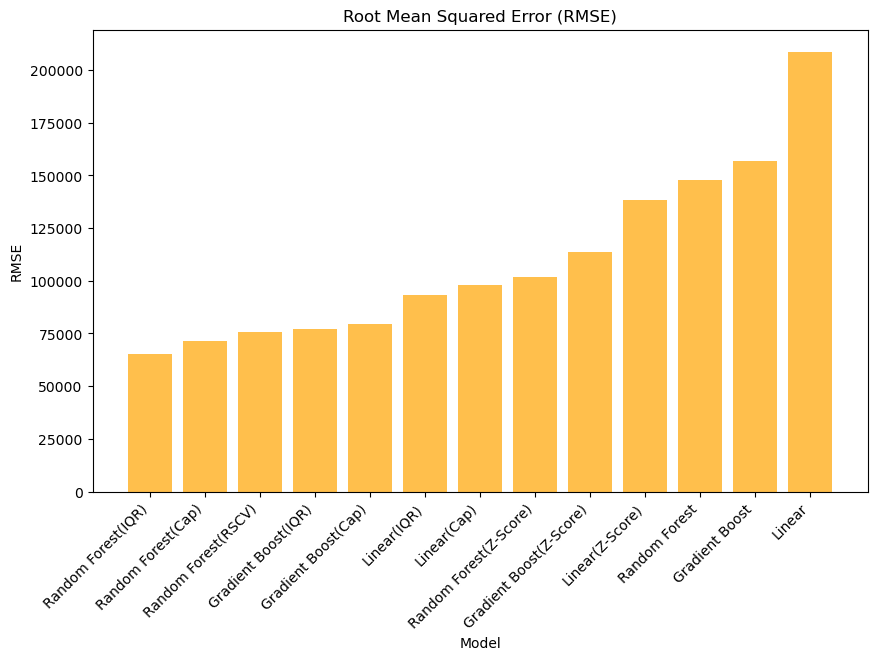

In [424]:
model_metrics_sorted = model_metrics.sort_values(by='RMSE', ascending=True)
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_sorted['Model'], model_metrics_sorted['RMSE'], color='orange', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.show()

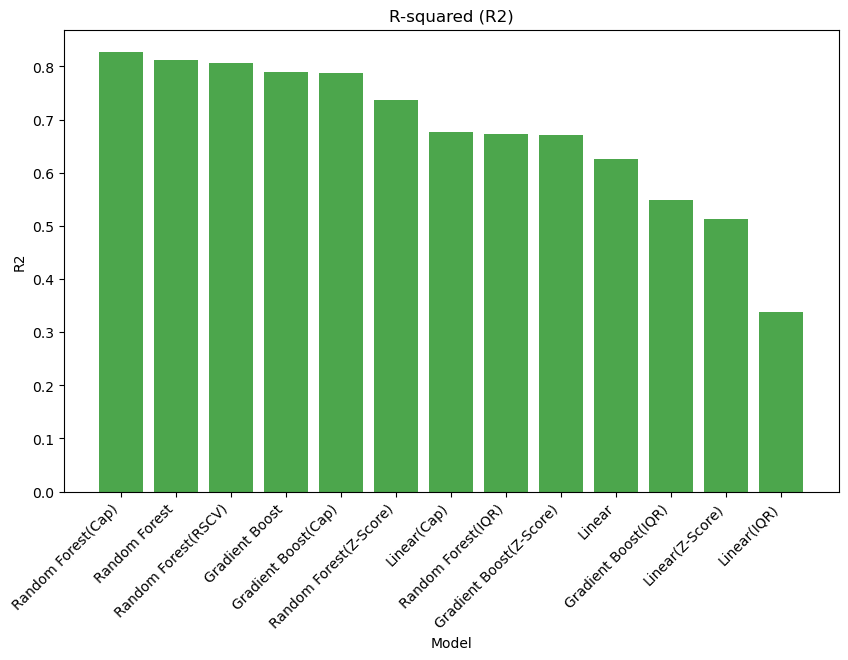

In [425]:
model_metrics_sorted = model_metrics.sort_values(by='R2', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_sorted['Model'], model_metrics_sorted['R2'], color='green', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R-squared (R2)')
plt.xticks(rotation=45, ha='right')
plt.show()